<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo V: Deep Learning </h1>
<h2 align='center'>  Redes Convolucionales </h2> 

---

# Aspectos Teóricos

## Introducción

Las **redes convolucionales** aparecen con el objetivo de disminuir la carga computacional a la hora de
resolver un problema de clasificación. Los anteriores clasificadores eran buenos para trabajar con matrices con pocas características (matriz “x” de tamaño reducido). El problema surge cuando estas matrices llegan a ser muy grandes, por ejemplo, un conjunto de ejemplos de entrenamiento de imágenes con dimensiones grandes. La idea de las redes convolucionales es extraer las características más significativas de una imagen con el objetivo de disminuir las matrices de características.

## ¿Qué son las Redes Convolucionales?

Las **redes convolucionales** son un tipo de redes neuronales que han demostrado tener un buen rendimiento en áreas como el reconocimiento y clasificación de imágenes. Las **CNNs** han tenido éxito en la identificación de caras, objetos y señales de tráfico, aparte, han aumentado la visión en robots y han mejorado el desarrollo de vehículos autónomos. Estas funcionan moviendo pequeños filtros a través de la imagen de entrada, esto significa que los filtros se reutilizan para reconocer patrones en toda la imagen de entrada. Esto hace que las redes convolucionales sean mucho más poderosas que las redes totalmente conectadas con el mismo número de variables. y que a su vez entrenen más rápido.

## ¿Cómo funcionan?

### Diagrama de flujos

<img src="imagenes/cnn1.png" alt="logo" style="width: 1000px;"/>

Las redes neuronales convolucionales trabajan modelando de forma consecutiva pequeñas piezas de información, y luego combinando esta información en las capas más profundas de la red. Una manera de entenderlas es que la primera capa intentará detectar los bordes y establecer patrones de detección de bordes. Luego, las capas posteriores trataran de combinarlos en formas más simples y, finalmente, en patrones de las diferentes posiciones de los objetos, iluminación, escalas, etc. Las capas finales intentarán hacer coincidir una imagen de entrada con todas los patrones y arribar a una predicción final como una suma ponderada de todos ellos. De esta forma las redes neuronales convolucionales son capaces de modelar complejas variaciones y comportamientos dando predicciones bastantes precisas.

La imagen de entrada se procesa en la primera capa convolucional utilizando los pesos de filtro. Esto da como resultado 16 nuevas imágenes, una para cada filtro en la capa convolucional. Las imágenes también se reducen en la muestra, por lo que la resolución de la imagen se reduce de 28x28 a 14x14.

Estas 16 imágenes más pequeñas se procesan en la segunda capa convolucional. Necesitamos ponderaciones de filtro para cada uno de estos 16 canales, y necesitamos ponderaciones de filtro para cada canal de salida de esta capa. Hay 36 canales de salida, por lo que hay un total de 16 x 36 = 576 filtros en la segunda capa convolucional. Las imágenes resultantes se vuelven a muestrear de nuevo a 7x7 píxeles.

La salida de la segunda capa convolucional es de 36 imágenes de 7x7 píxeles cada una. Luego se aplanan a un solo vector de longitud 7 x 7 x 36 = 1764, que se utiliza como entrada a una capa totalmente conectada con 128 neuronas (o elementos). Esto se alimenta a otra capa totalmente conectada con 10 neuronas, una para cada una de las clases, que se utiliza para determinar la clase de la imagen, es decir, el número que se muestra en la imagen.

Los filtros convolucionales se escogen inicialmente al azar, por lo que la clasificación se realiza de forma aleatoria. El error entre la clase predicha y la clase real de la imagen de entrada se mide como la llamada entropía cruzada. El optimizador luego propaga automáticamente este error a través de la red convolucional utilizando la regla de diferenciación en cadena y actualiza los pesos de los filtros para mejorar el error de clasificación. Esto se hace repetidamente miles de veces hasta que el error de clasificación es suficientemente bajo.

## Estructura de una Red Convolucional

### Capa Convolucional

El normbre de las redes convolucionales viene de la operación convolución. El principal propósito de una Convolución en las redes convolucionales es el de extraer las características de una imagen de entrada.

<img src="imagenes/convolucion1.gif" alt="logo" style="width: 500px;"/>

<img src="imagenes/convolucion2.gif" alt="logo" style="width: 500px;"/>

La siguiente tabla muestra la idea básica de procesar una imagen en la primera capa convolucional. La imagen de entrada muestra el número 7 y aquí se muestran cuatro copias de la imagen, por lo que podemos ver más claramente cómo se mueve el filtro a diferentes posiciones de la imagen. Para cada posición del filtro, el producto puntual se calcula entre el filtro y los píxeles de la imagen debajo del filtro, lo que resulta en un solo píxel en la imagen de salida. Por lo tanto, al mover el filtro a través de toda la imagen de entrada, se genera una nueva imagen.

El filtro de color rojo significa que el filtro tiene una reacción positiva a los píxeles negros en la imagen de entrada, mientras que los píxeles azules significa que el filtro tiene una reacción negativa a los píxeles negros.

En este caso, parece que el filtro reconoce la línea horizontal de los 7 dígitos, como se puede ver en su reacción más fuerte a esa línea en la imagen de salida.

<img src="imagenes/cnn2.png" alt="logo" style="width: 400px;"/>

## Ejemplos de filtros

In [1]:
import cv2
import numpy as np

### Erosión

In [21]:
img = cv2.imread('filtros/erode.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
#Mostrar el resultado y salir
cv2.imshow('Original',img)
cv2.imshow('Resultado',erosion) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### Dilatación

In [22]:
#Cargar la mascara
imagen = cv2.imread('filtros/dilatacion.png',0)
 
#Crear un kernel de '1' de 3x3
kernel = np.ones((3,3),np.uint8)
 
#Se aplica la transformacion: Dilate
transformacion = cv2.dilate(imagen,kernel,iterations = 1)
 
#Mostrar el resultado y salir
cv2.imshow('Original',imagen)
cv2.imshow('resultado',transformacion)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Gradiente Morfologico (diferencia de los dos anteriores)

In [23]:
#Cargar la mascara
imagen = cv2.imread('filtros/gradiente.png',0)
 
#Crear un kernel de '1' de 3x3
kernel = np.ones((3,3),np.uint8)
 
#Se aplica la transformacion: Morphological Gradient
transformacion = cv2.dilate(imagen,kernel,iterations = 1) - cv2.erode(imagen,kernel,iterations = 1)
 
#Mostrar el resultado y salir
cv2.imshow('Original',imagen)
cv2.imshow('resultado',transformacion)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Opening

In [24]:
#Cargar la mascara
imagen = cv2.imread('filtros/opening.png',0)
 
#Crear un kernel de '1' de 3x3
kernel = np.ones((3,3),np.uint8)
 
#Se aplica la transformacion: Opening
transformacion = cv2.morphologyEx(imagen,cv2.MORPH_OPEN,kernel)
 
#Mostrar el resultado y salir
cv2.imshow('Original',imagen)
cv2.imshow('resultado',transformacion)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Closing

In [25]:
#Cargar la mascara
imagen = cv2.imread('filtros/closing.png',0)
 
#Crear un kernel de '1' de 3x3
kernel = np.ones((3,3),np.uint8)
 
#Se aplica la transformacion: Closing
transformacion = cv2.morphologyEx(imagen,cv2.MORPH_CLOSE,kernel)
 
#Mostrar el resultado y salir
cv2.imshow('Original',imagen)
cv2.imshow('resultado',transformacion)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Top Hat

In [26]:
#Cargar la mascara
imagen = cv2.imread('filtros/tophat.png',0)
 
#Crear un kernel de '1' de 3x3
kernel = np.ones((9,9),np.uint8)
 
#Se aplica la transformacion: Top Hat
transformacion = cv2.morphologyEx(imagen,cv2.MORPH_TOPHAT,kernel)
 
#Mostrar el resultado y salir
cv2.imshow('Original',imagen)
cv2.imshow('resultado',transformacion)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Black Hat

In [27]:
#Cargar la mascara
imagen = cv2.imread('filtros/blackhat.png',0)
 
#Crear un kernel de '1' de 3x3
kernel = np.ones((9,9),np.uint8)
 
#Se aplica la transformacion: Black Hat
transformacion = cv2.morphologyEx(imagen,cv2.MORPH_BLACKHAT,kernel)
 
#Mostrar el resultado y salir
cv2.imshow('Original',imagen)
cv2.imshow('resultado',transformacion)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Importancia de la capa convolucional

* Interacciones dispersas, ya que al aplicar un filtro de menor tamaño sobre la entrada original podemos reducir drásticamente la cantidad de parámetros y cálculos;

* Los parámetros compartidos, que hace referencia a compartir los parámetros entre los distintos tipos de filtros, ayudando también a mejorar la eficiencia del sistema; y

* las representaciones equivariante, que indican que si las entradas cambian, las salidas van a cambiar también en forma similar.

Por otra parte, la convolución proporciona un medio para trabajar con entradas de tamaño variable, lo que puede ser también muy conveniente

<img src="imagenes/conv_layer.png" alt="logo" style="width: 500px;"/>

## Capa de reducción o pooling

La capa de reducción o pooling se coloca generalmente después de la capa convolucional. Su utilidad principal radica en la reducción de las dimensiones espaciales (ancho x alto) del volumen de entrada para la siguiente capa convolucional. No afecta a la dimensión de profundidad del volumen. La operación realizada por esta capa también se llama reducción de muestreo, ya que la reducción de tamaño conduce también a la pérdida de información. Sin embargo, una pérdida de este tipo puede ser beneficioso para la red por dos razones:

la disminución en el tamaño conduce a una menor sobrecarga de cálculo para las próximas capas de la red;
también trabaja para reducir el sobreajuste.
La operación que se suele utilizar en esta capa es max-pooling, que divide a la imagen de entrada en un conjunto de rectángulos y, respecto de cada subregión, se va quedando con el máximo valor.

<img src="imagenes/pooling.png" alt="logo" style="width: 400px;"/>

## Capa Clasificadora

Al final de las capas convolucional y de pooling, las redes utilizan generalmente capas completamente conectados en la que cada pixel se considera como una neurona separada al igual que en una red neuronal regular. Esta última capa clasificadora tendrá tantas neuronas como el número de clases que se debe predecir.

## Ejemplo- Dataset CIFAR 10

Luego de toda esta introducción teórica es tiempo de pasar a la acción y ver como podemos aplicar todo lo que hemos aprendimos para crear una red neuronal convolucional con la ayuda de Keras y TensorFlow. En este ejemplo vamos a intentar clasificar imágenes en 10 categorías distintas; la idea es entrenar la red para que pueda distinguir entre imágenes de aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones. Para esto vamos a utilizar el conjunto de datos CIFAR-10.

### Información sobre el dataset

El conjunto de datos CIFAR-10 consta de 60.000 imágenes a color de 32x32 que están divididas en 10 clases distintas; con 6.000 imágenes por cada clase. Tiene 50.000 imágenes de entrenamiento y 10.000 imágenes de prueba. CIFAR-10 se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10.000 imágenes. El lote de prueba contiene exactamente 1.000 imágenes seleccionadas al azar de cada clase. Los lotes de entrenamiento contienen las imágenes restantes en orden aleatorio, pero algunos lotes de entrenamiento pueden tener más imágenes de una clase que otro. Entre todos ellos, los lotes de entrenamiento contienen exactamente 5.000 imágenes de cada clase. Las clases son completamente mutuamente excluyentes. No existe solapamiento entre automóviles y camiones.

#### Se importa el conjunto de datos

In [1]:
import keras
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D,MaxPooling2D,Activation
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

#### Se definen los parámetros del modelo

In [3]:
batch_size = 32
num_clases = 10
epocas = 100

#### Se separan los datos de entrenamiento y validación

In [32]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [160]:
clases ={0: 'avion', 1: 'automovil', 2: 'pajaro', 3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana', 7: 'caballo', 8: 'barco', 9: 'camion'}

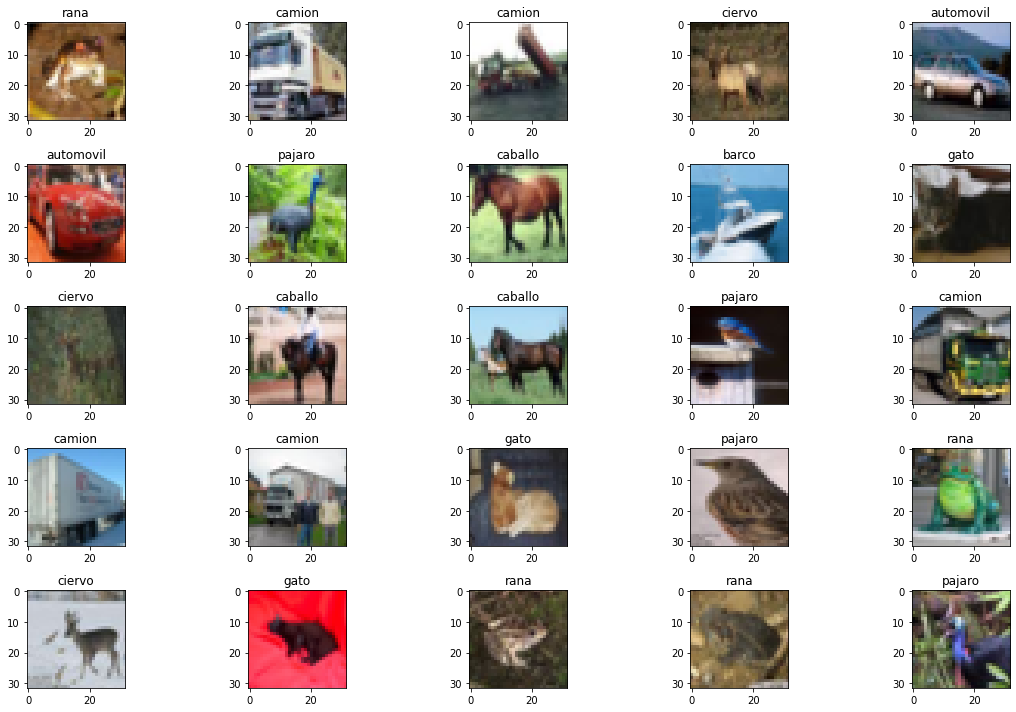

In [163]:
plt.figure(figsize=(16,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    plt.imshow(x_train[i-1])    
    plt.title(clases[int(y_train[i-1])])
plt.show()

#### Se normalizan los datos

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### Convertir las clases en vectores binarios

In [8]:
y_train = keras.utils.to_categorical(y_train, num_clases)
y_test = keras.utils.to_categorical(y_test, num_clases)

#### Se define el modelo

In [11]:
model = Sequential()

# Se define una capa de convolucion
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Se define otro conjunto de capas convolucionales

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Capa completamente conectada

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(num_clases))
model.add(Activation('softmax'))


### Resumen del modelo

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

#### Se compila el modelo

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Se corre el modelo

In [30]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = epocas, batch_size=batch_size,verbose=2)

Epoch 1/50
250/250 - 7s - loss: 0.4240 - accuracy: 0.8482 - val_loss: 0.6379 - val_accuracy: 0.7905
Epoch 2/50
250/250 - 7s - loss: 0.4110 - accuracy: 0.8548 - val_loss: 0.6392 - val_accuracy: 0.7920
Epoch 3/50
250/250 - 7s - loss: 0.4095 - accuracy: 0.8552 - val_loss: 0.6188 - val_accuracy: 0.8001
Epoch 4/50
250/250 - 7s - loss: 0.3915 - accuracy: 0.8593 - val_loss: 0.6166 - val_accuracy: 0.7980
Epoch 5/50
250/250 - 7s - loss: 0.3772 - accuracy: 0.8668 - val_loss: 0.6414 - val_accuracy: 0.7971
Epoch 6/50
250/250 - 7s - loss: 0.3680 - accuracy: 0.8679 - val_loss: 0.6276 - val_accuracy: 0.7952
Epoch 7/50
250/250 - 7s - loss: 0.3615 - accuracy: 0.8710 - val_loss: 0.6295 - val_accuracy: 0.8009
Epoch 8/50
250/250 - 7s - loss: 0.3508 - accuracy: 0.8755 - val_loss: 0.6335 - val_accuracy: 0.7950
Epoch 9/50
250/250 - 7s - loss: 0.3376 - accuracy: 0.8798 - val_loss: 0.6401 - val_accuracy: 0.8004
Epoch 10/50
250/250 - 7s - loss: 0.3313 - accuracy: 0.8812 - val_loss: 0.6418 - val_accuracy: 0.7979

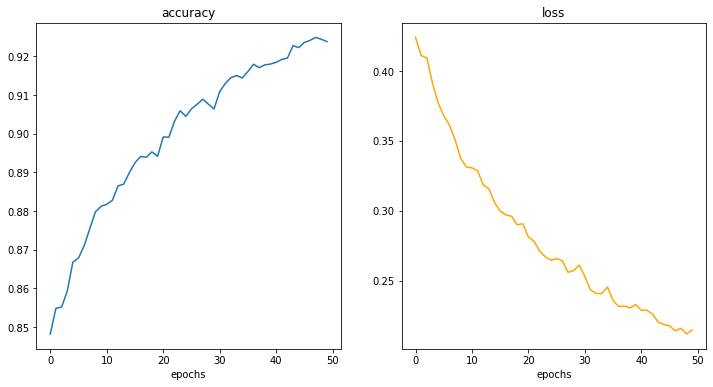

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='orange')
plt.title('loss')
plt.xlabel('epochs')
plt.show()

## Predicción

In [44]:
prediccion = model.predict(x_test)

In [58]:
prediccion = np.argmax(prediccion,axis=1)

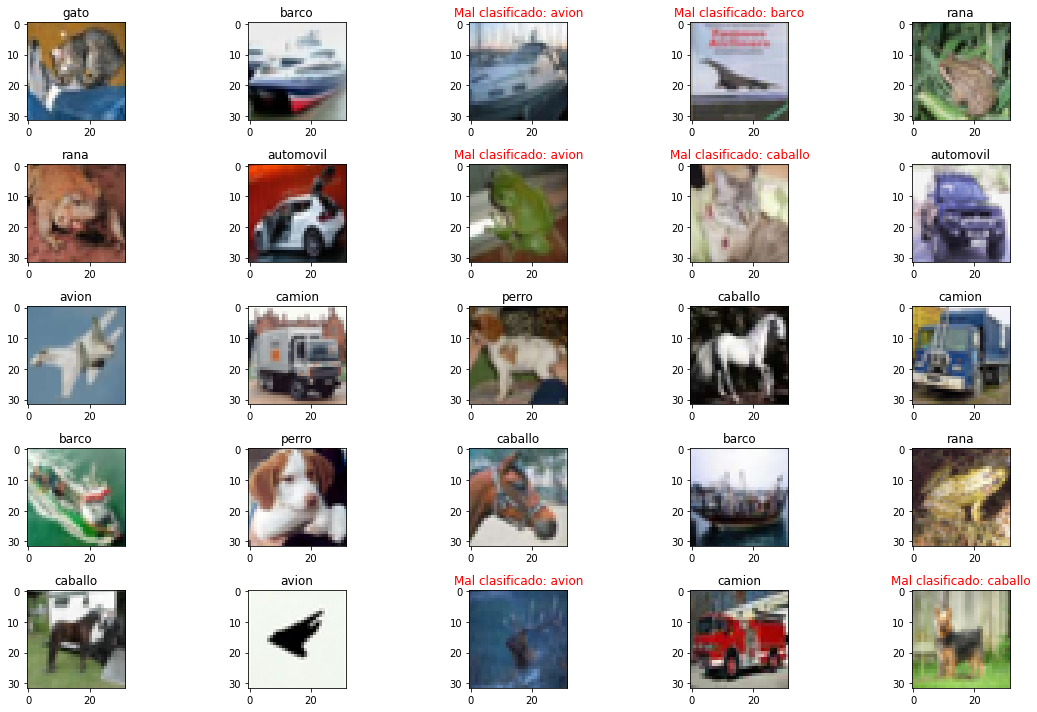

In [132]:
plt.figure(figsize=(16,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    plt.imshow(x_test[i-1])
    if prediccion[i-1]==y_test[i-1]:
        plt.title(clases[prediccion[i-1]])
    else:
        titulo = 'Mal clasificado: ' +  clases[prediccion[i-1]]
        plt.title(titulo,color= 'red')    

## Ejemplo particular

In [133]:
img = plt.imread('imagenes/img_prueba1.jpg')

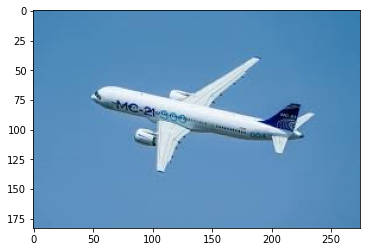

In [134]:
plt.imshow(img);

In [135]:
img_nueva = cv2.resize(img,(32,32),interpolation = cv2.INTER_AREA)

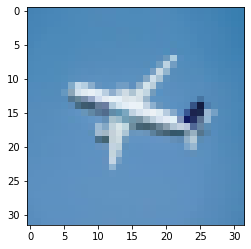

In [136]:
plt.imshow(img_nueva);

In [137]:
pred = model.predict(img_nueva[np.newaxis,:])

In [138]:
print('La imagen corresponde a un',clases[np.argmax(pred)])

La imagen corresponde a un avion


In [139]:
img2 = plt.imread('imagenes/img_prueba2.jpg')

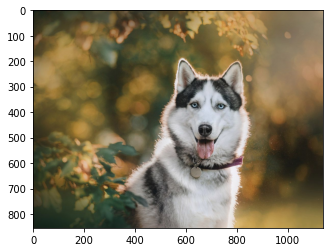

In [140]:
plt.imshow(img2);

In [141]:
img_nueva2 = cv2.resize(img2,(32,32),interpolation = cv2.INTER_AREA)

In [142]:
pred2 = model.predict(img_nueva2[np.newaxis,:])

In [143]:
print('La imagen corresponde a un',clases[np.argmax(pred2)])

La imagen corresponde a un perro
